# *Aufgabe: Statistische Grundlagen*

1. Laden Sie den Census Datensatz mittels Pandas in Ihre Notebook:

In [1]:
import pandas as pd
import os

census = pd.read_csv('../data/Census-Datensatz.csv', sep=';', header=0, encoding='utf-8')
census.rename(columns={"income": "target"}, inplace=True)
print(census.columns)

# Pop the columns:

to_pop = ["occupation", "relationship", "capital-gain", "capital-loss", "native-country", "education", "workclass", "marital-status"]

for col in to_pop:
    census.pop(col)

# Numerische Werte:

sex_dict = {' Male': 1, ' Female': 0}
census["sex"] = census["sex"].replace(sex_dict)

race_dict = {' Asian-Pac-Islander': 4, ' White': 3, ' Black': 2, ' Amer-Indian-Eskimo':1, ' Other': 0}
census["race"] = census["race"].replace(race_dict)

# Sie können noch education oder other Features mitreinnehmen.

target_dict = {' >50K': 1, ' <=50K': 0}
census["target"] = census["target"].replace(target_dict)

census.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')


,age,fnlwgt,education-num,race,sex,hours-per-week,target
0,39,77516,13,3,1,40,0
1,50,83311,13,3,1,13,0
2,38,215646,9,3,1,40,0
3,53,234721,7,2,1,40,0
4,28,338409,13,2,0,40,0


2. Führen Sie für alle relevante Feaures eine explorative Datenanalyse zusammen: Erstellen Sie eine visuelle Übersicht über den Datensatz:

Matplotlib is building the font cache; this may take a moment.


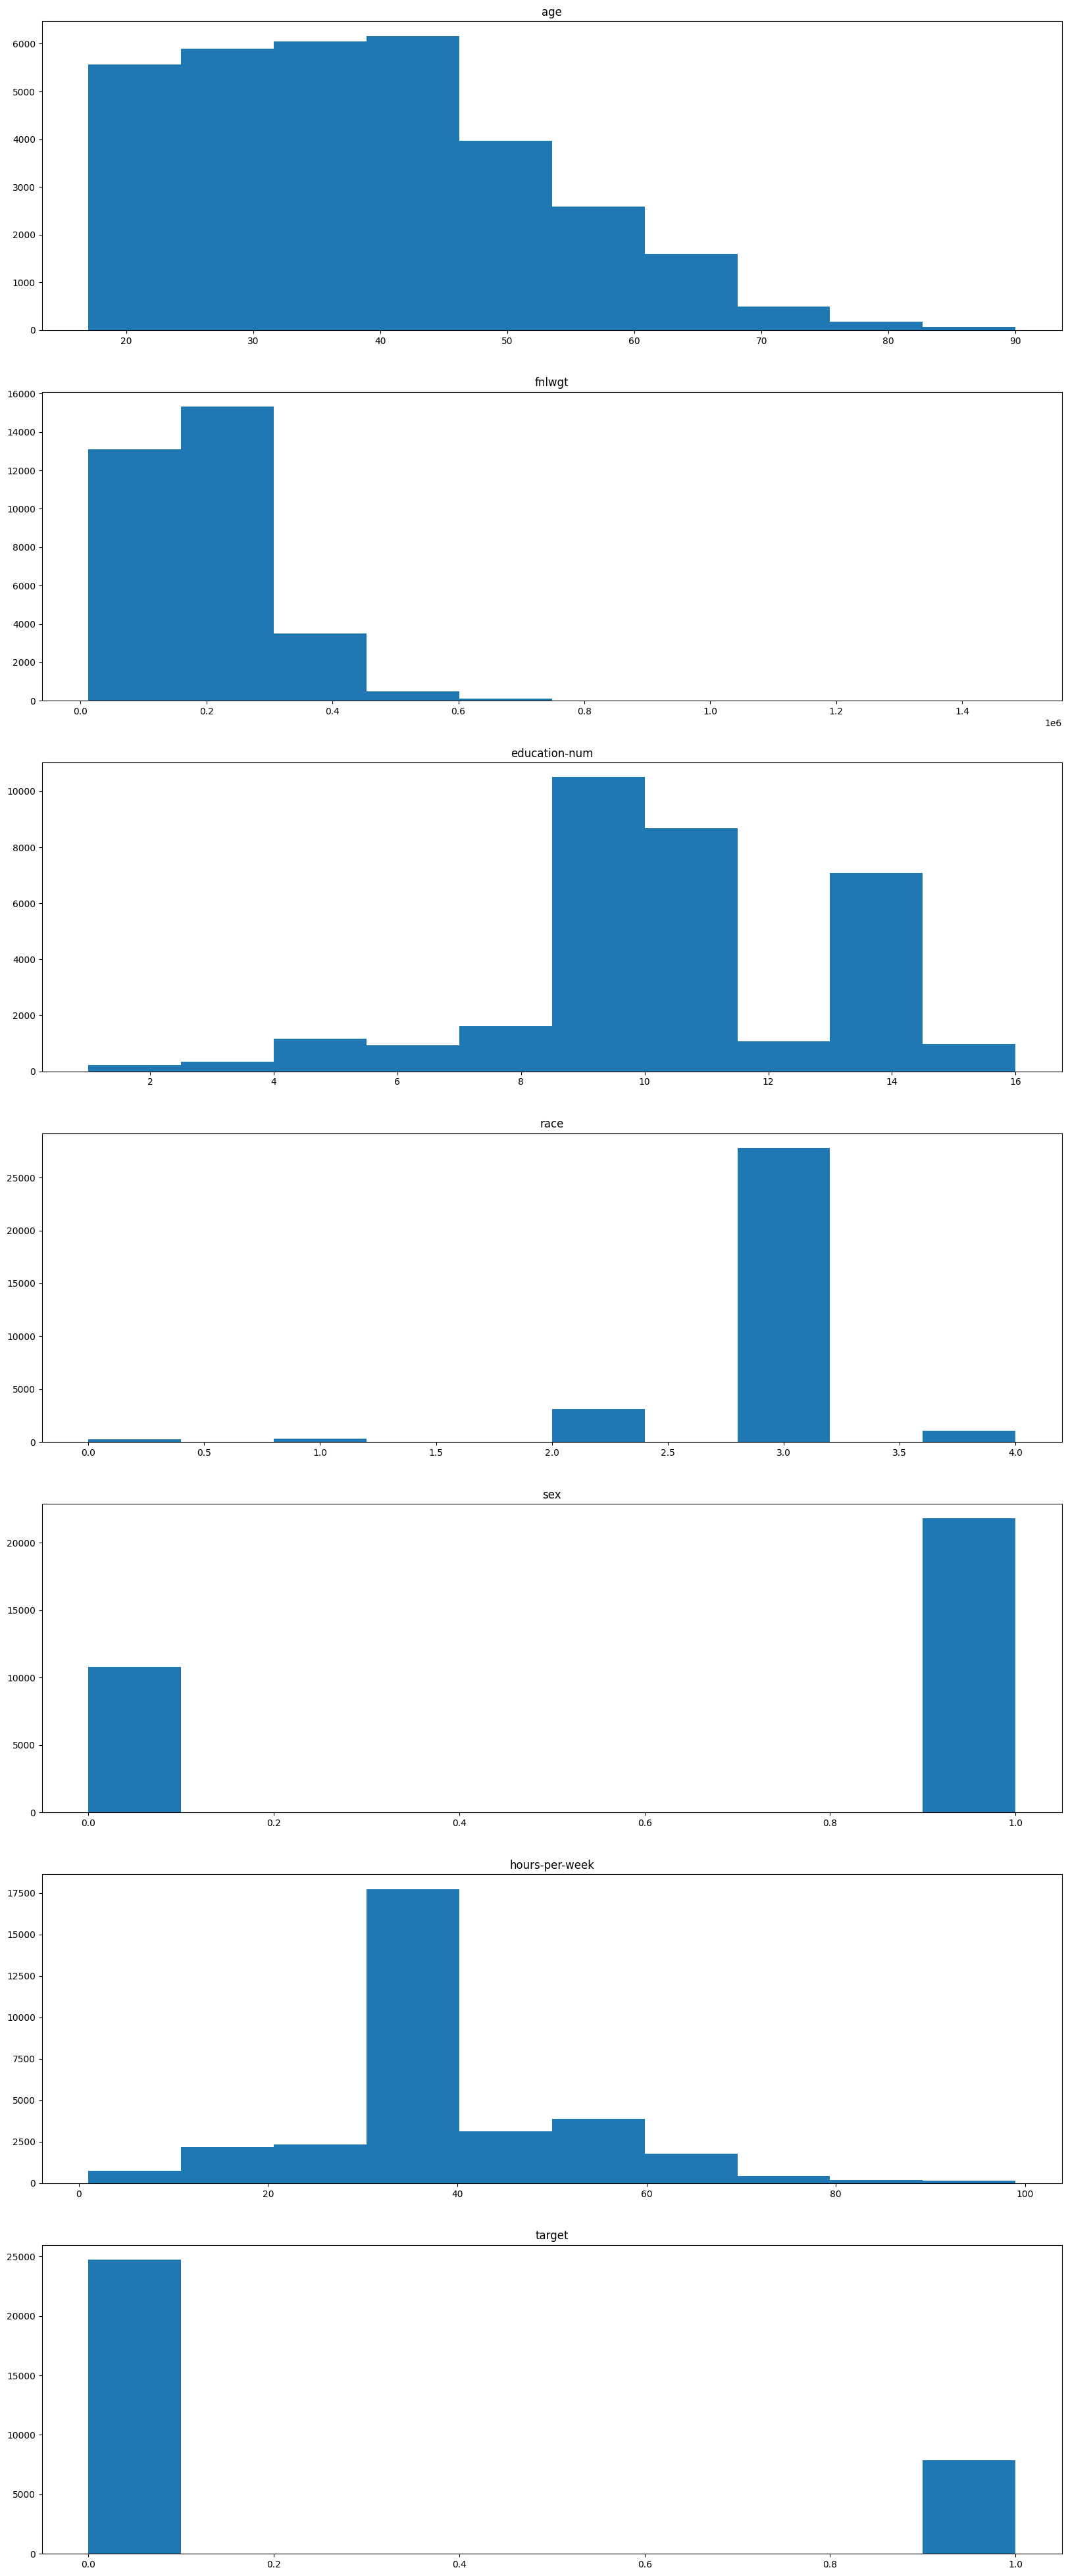

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(census.columns), 1, figsize=(20,50))
for i in range(len(census.columns)):
    axs[i].hist(census[census.columns[i]])
    axs[i].set_title(census.columns[i])

plt.show()

3. Finden Sie Auffälligkeiten im Datensatz. Welches Visualisierungstool könnte dabei hilfreich sein?

/tmp/ipykernel_4519/1692969286.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(census,labels=census.columns,medianprops=dict(color="#1ACC94"))


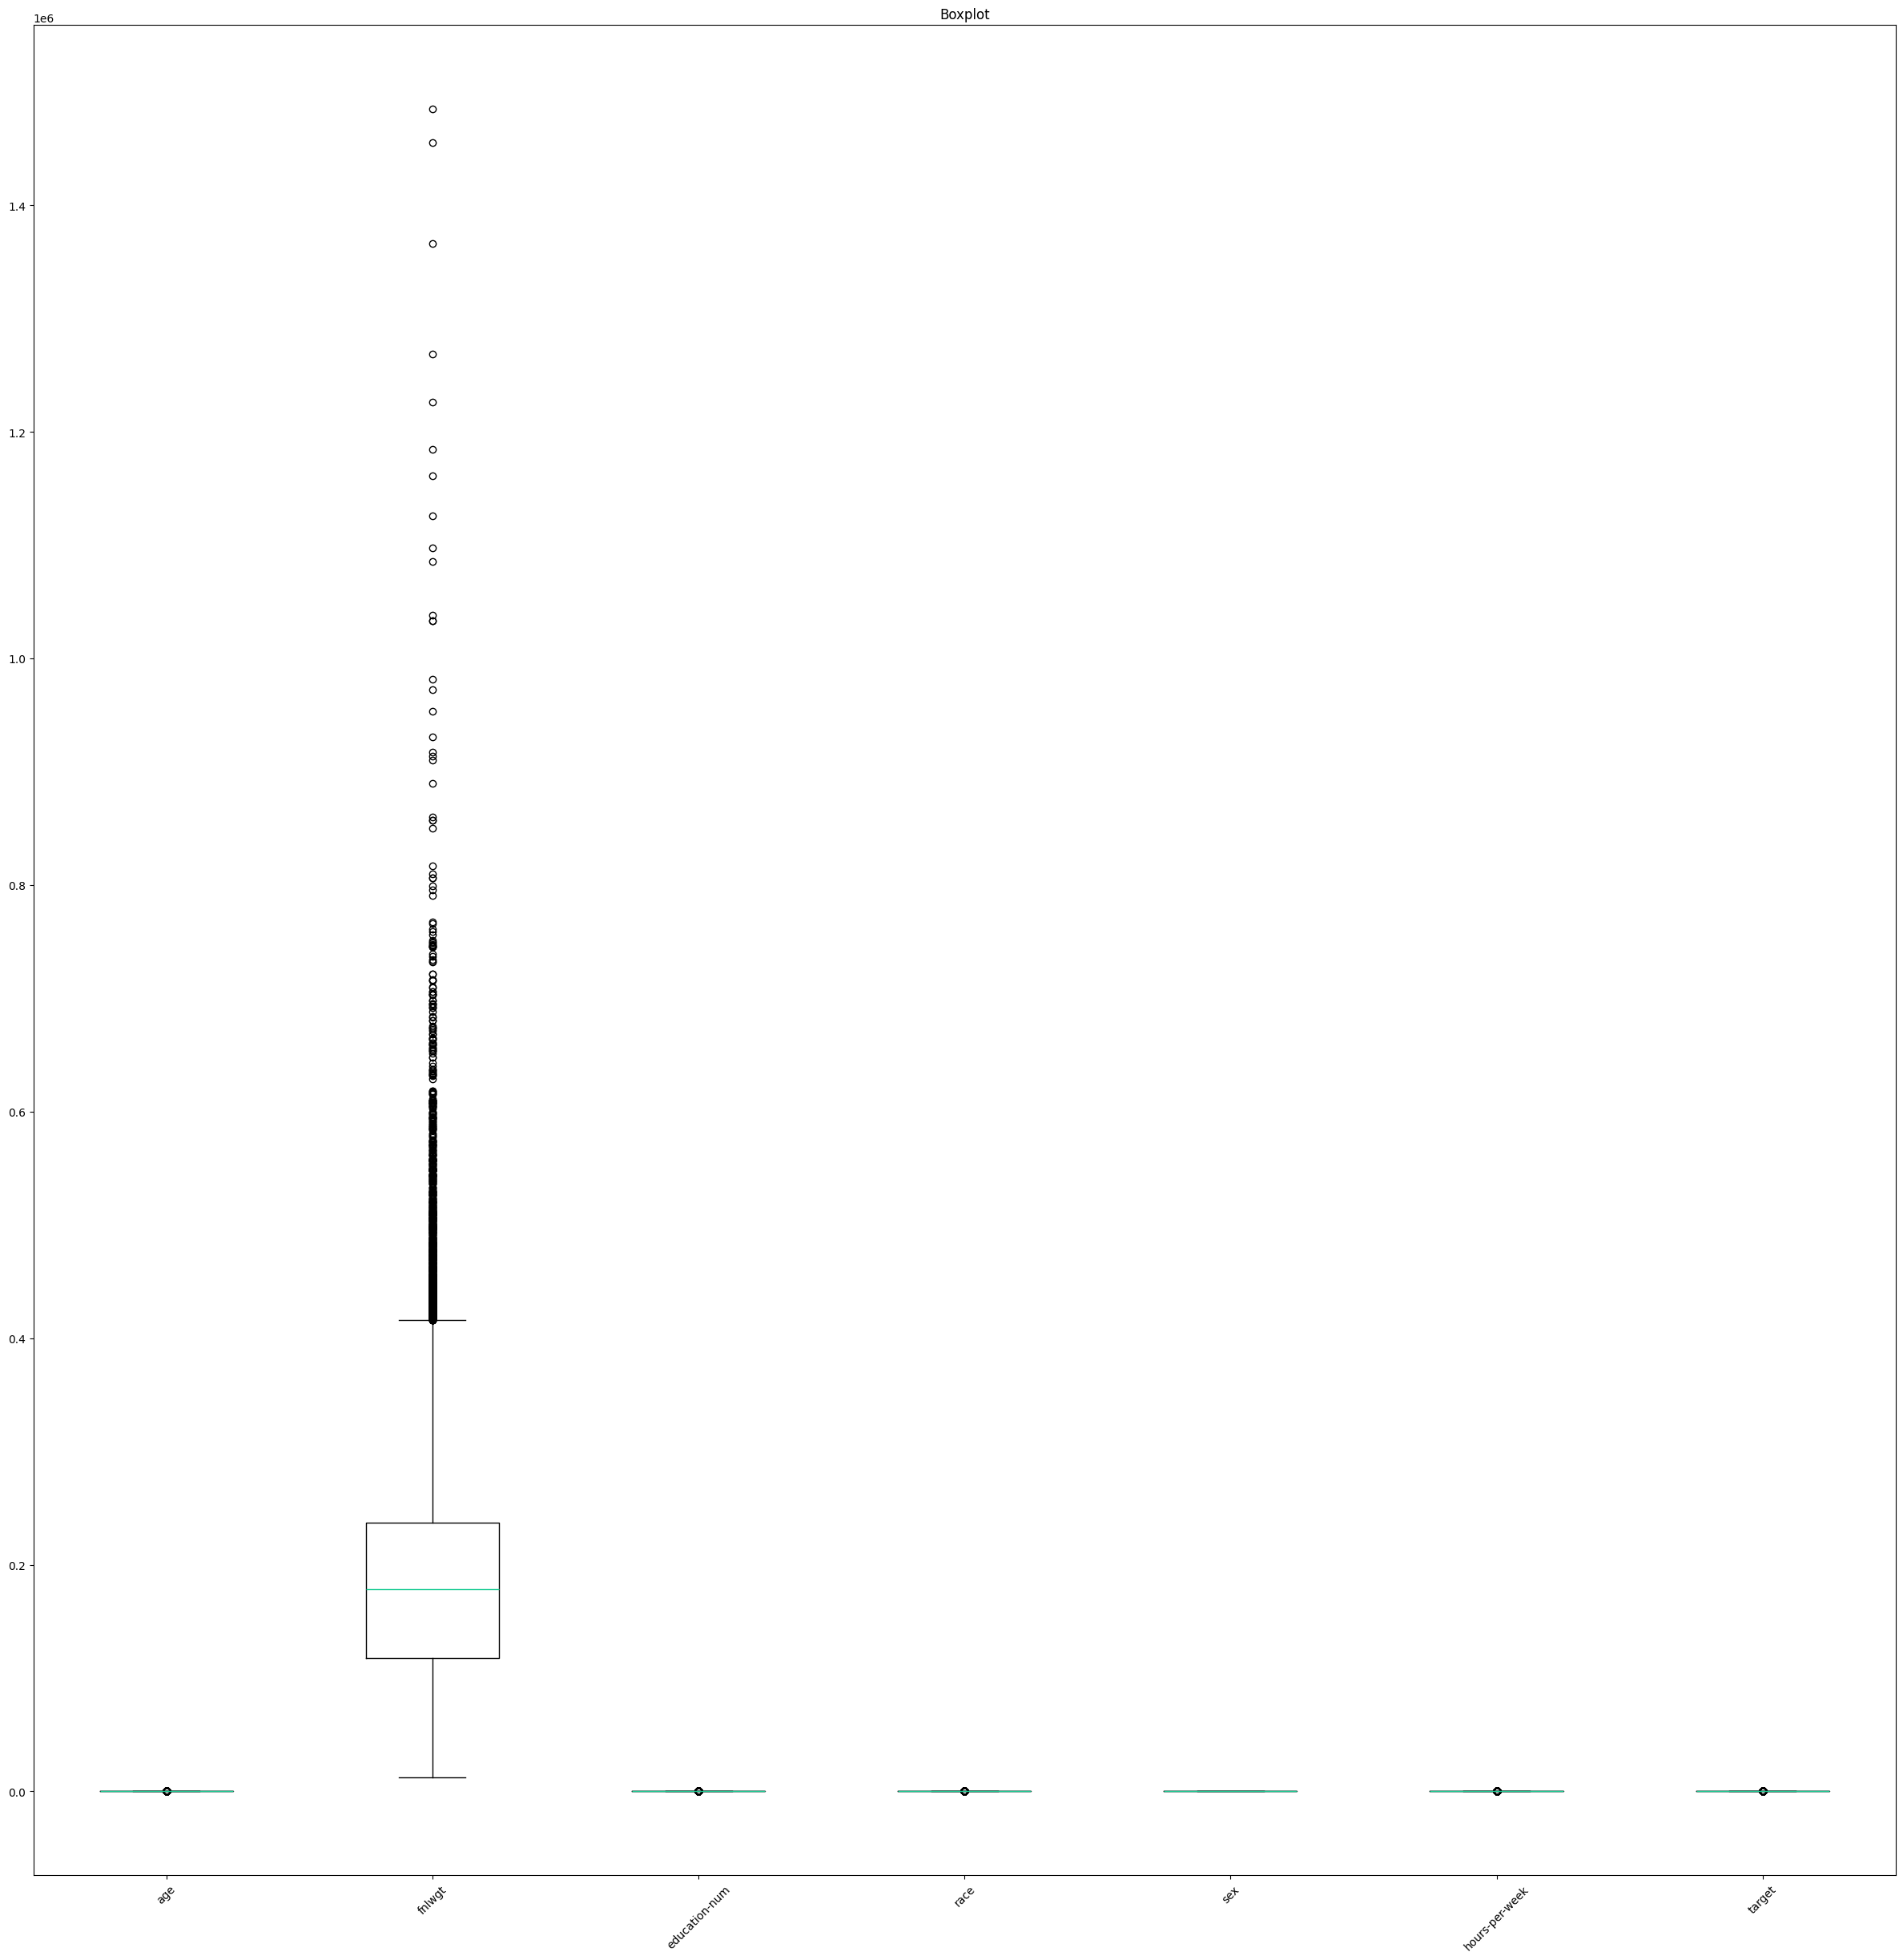

In [3]:
plt.figure(figsize=(30,30))
plt.title("Boxplot")
plt.boxplot(census,labels=census.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=45)
plt.show()

4. Geben Sie eine erste Abschätzung, welche Features für die Vorhersage des Targets (Einkommen größer oder kleiner als 50k) gut geeignet sind und versuchen Sie mithilfe der betrachteten statistischen Werkzeug Diskriminierung beim Gehalt aufzuzeigen:

In [4]:
census.corr()

# Warum ist diese Analyse nicht optimal?

,age,fnlwgt,education-num,race,sex,hours-per-week,target
age,1.000000,-0.076646,0.036527,0.031582,0.088832,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.068992,0.026858,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.106130,0.012280,0.148123,0.335154
race,0.031582,-0.068992,0.106130,1.000000,0.083102,0.036367,0.088451
sex,0.088832,0.026858,0.012280,0.083102,1.000000,0.229309,0.215980
hours-per-week,0.068756,-0.018768,0.148123,0.036367,0.229309,1.000000,0.229689
target,0.234037,-0.009463,0.335154,0.088451,0.215980,0.229689,1.000000


In [5]:
# Besserer Weg: straightforward

for race in race_dict:
    census_temp = census[census.race == race_dict[race]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), race))

print("-----------------------------------------------------")

for sex in sex_dict:
    census_temp = census[census.sex == sex_dict[sex]]
    grater50 = census_temp[census_temp.target == 1].shape[0]
    print("{}% of{} people earn more than 50K".format(round(grater50/census_temp.shape[0]*100,2), sex))

26.56% of Asian-Pac-Islander people earn more than 50K
25.59% of White people earn more than 50K
12.39% of Black people earn more than 50K
11.58% of Amer-Indian-Eskimo people earn more than 50K
9.23% of Other people earn more than 50K
-----------------------------------------------------
30.57% of Male people earn more than 50K
10.95% of Female people earn more than 50K
